# Importing Libraries and Dataset

In [1]:
#Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt


In [2]:
# Import cab dataset
cab_data = pd.read_csv('Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
#cab_data.shape
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


The **Date of Travel** feature is of serial number format.

In [4]:
cab_data['Date of Travel'] = pd.TimedeltaIndex(cab_data['Date of Travel'], unit='d') + dt.datetime(1900,1,1)
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
# Check for missing values
cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There is no missing values in this dataset

In [6]:
# Import city dataset
city_data = pd.read_csv('City.csv')
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [7]:
#city_data.shape()
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


Both Population and Users are of object data type. Converting these columns to numeric

In [8]:
# Removing commas
city_data.Population = [city_data.Population[i].replace(",", "") for i in range(len(city_data))]
city_data.Users = [city_data.Users[i].replace(",", "") for i in range(len(city_data))]
city_data

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [9]:
# Converting the Population and Users columns to dtype int64
city_data.Population = city_data.Population.astype('int64')
city_data.Users = city_data.Users.astype('int64')
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [10]:
# Check if Cities in the city_df dataset are in cab_df
np.setdiff1d(city_data.City, cab_data.City)

array(['SAN FRANCISCO CA'], dtype=object)

*San Francisco CA* is **not** in the city_data dataset. This city will be dropped when joining city_data with the cab_data dataset

In [11]:
temp_df = pd.merge(cab_data, city_data, on='City')
temp_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Population        0
Users             0
dtype: int64

In [12]:
# Importing transaction ID dataset
trans_data = pd.read_csv('Transaction_ID.csv')
trans_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [13]:
#trans_data.shape()
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [14]:
# Check for missing Transaction ID's that are not present in the cab_data dataset
len(np.setdiff1d(trans_data['Transaction ID'], cab_data['Transaction ID']))

80706

There are 80,706 Transaction ID values that are not present in the cab_data dataset that are present in the trans_data dataset. These will be dropped when joining trans_data with the temp_df dataset.

In [15]:
t1_df = pd.merge(temp_df, trans_data, on='Transaction ID')

In [16]:
# Import customer ID dataset
cust_data = pd.read_csv('Customer_ID.csv')
cust_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [17]:
#cust_df.shape()
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
# Check for missing Customer ID's that are not present in the t1_df1 dataset
len(np.setdiff1d(cust_data['Customer ID'], t1_df['Customer ID']))

3023

There are 3,023 Customer ID values that are not present in the t1_df1 dataset that are present in the cust_data dataset. These will be dropped when joining cust_data with the t1_df dataset.

In [19]:
master_df = pd.merge(t1_df, cust_data, on='Customer ID')
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237


In [20]:
#master_df.shape()
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [21]:
# Checking for missing values
master_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

We have joined all datasets and created a master dataset which includes columns from all of the datasets.

In [22]:
# Split city column
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(master_df)):
    if master_df.City[i].split()[~0] in US_States:
        city.append(master_df.City[i].split(f' {master_df.City[i].split()[~0]}')[0])
        state.append(master_df.City[i].split()[~0])
    else:
        city.append(master_df.City[i])
        state.append(np.nan)

In [23]:
master_df['City'] = city
master_df['State'] = state
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),State
0,10000011,2016-01-10,Pink Cab,ATLANTA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,GA
1,10351127,2018-07-23,Yellow Cab,ATLANTA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,GA
2,10412921,2018-11-25,Yellow Cab,ATLANTA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,GA
3,10000012,2016-01-08,Pink Cab,ATLANTA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,GA
4,10320494,2018-04-23,Yellow Cab,ATLANTA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,GA


In [24]:
# Check for missing values
master_df.isnull().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Population                0
Users                     0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
State                 12501
dtype: int64

There are about 12501 observations with missing values in the state feature. Check which cities have missing state values.

In [25]:
master_df[master_df.State.isnull()]['City'].unique()

array(['ORANGE COUNTY', 'SILICON VALLEY'], dtype=object)

Since both Orange County and Silicon Valley are located within the state of California, fill missing values with 'CA' (California) 

In [26]:
master_df.fillna('CA', inplace = True)

In [27]:
# Check for missing values
master_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
State                 0
dtype: int64

In [28]:
# Check for duplicated observations
master_df.duplicated().sum()

0

The master_df dataset now has no missing values or duplicates.

In [29]:
# Replace spaces in columns with _ and lowercase all letters

master_df.columns = [col.strip().replace(' ', '_').lower() for col in master_df.columns]
master_df.rename(columns = {
    'income_(usd/month)' : 'customer_income',
    'date_of_travel' : 'travel_date'
}, inplace=True)
master_df.columns

Index(['transaction_id', 'travel_date', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'population', 'users', 'customer_id',
       'payment_mode', 'gender', 'age', 'customer_income', 'state'],
      dtype='object')

In [30]:
# Sort the data based on Transaction ID and Date of Travel
master_df.sort_values(['travel_date'], ignore_index=True, inplace=True)
master_df.head()

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,customer_income,state
0,10000429,2016-01-04,Yellow Cab,BOSTON,15.15,342.62,205.4340,248968,80021,57474,Card,Male,34,16558,MA
1,10000525,2016-01-04,Yellow Cab,CHICAGO,2.18,51.47,26.4216,1955130,164468,4551,Cash,Male,19,6316,IL
2,10001234,2016-01-04,Yellow Cab,SEATTLE,39.60,1119.67,541.7280,671238,25063,38146,Cash,Male,36,6577,WA
3,10001311,2016-01-04,Yellow Cab,WASHINGTON,34.65,707.94,474.0120,418859,127001,53048,Card,Male,23,31566,DC
4,10000927,2016-01-04,Yellow Cab,NEW YORK,34.56,1121.11,485.2224,8405837,302149,1808,Cash,Male,59,18999,NY


### Data is Ready for EDA

# Hypotheses

My hypotheses for this project are:
- Which company **Yellow Cab** or **Pink Cab** are more profitable?
- Is there any seasonality in number of customers using the cab service?
- Are the drivers profitable?
- Is there any correlation with the features in the dataset?
- When and how much was the greatest total losses made by both companies?
- Does price charged vary at State level?
- Does profit vary at State level?

# Exploratory Data Analysis

In [31]:
master_df.groupby(['state', 'city']).mean()[['population', 'users']]

C:\Users\swimt\AppData\Local\Temp\ipykernel_1144\1031878476.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  master_df.groupby(['state', 'city']).mean()[['population', 'users']]


population     users
state city                                
AZ    PHOENIX           943999.0    6133.0
      TUCSON            631442.0    5712.0
CA    LOS ANGELES      1595037.0  144132.0
      ORANGE COUNTY    1030185.0   12994.0
      SACRAMENTO        545776.0    7044.0
      SAN DIEGO         959307.0   69995.0
      SILICON VALLEY   1177609.0   27247.0
CO    DENVER            754233.0   12421.0
DC    WASHINGTON        418859.0  127001.0
FL    MIAMI            1339155.0   17675.0
GA    ATLANTA           814885.0   24701.0
IL    CHICAGO          1955130.0  164468.0
MA    BOSTON            248968.0   80021.0
NY    NEW YORK         8405837.0  302149.0
PA    PITTSBURGH        542085.0    3643.0
TN    NASHVILLE         327225.0    9270.0
TX    AUSTIN            698371.0   14978.0
      DALLAS            942908.0   22157.0
WA    SEATTLE           671238.0   25063.0

C:\Users\swimt\AppData\Local\Temp\ipykernel_1144\340694922.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  demograph = master_df.groupby(['state', 'city']).mean()[['population', 'users']].sum(level = 0)
C:\Users\swimt\AppData\Local\Temp\ipykernel_1144\340694922.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  demograph = master_df.groupby(['state', 'city']).mean()[['population', 'users']].sum(level = 0)


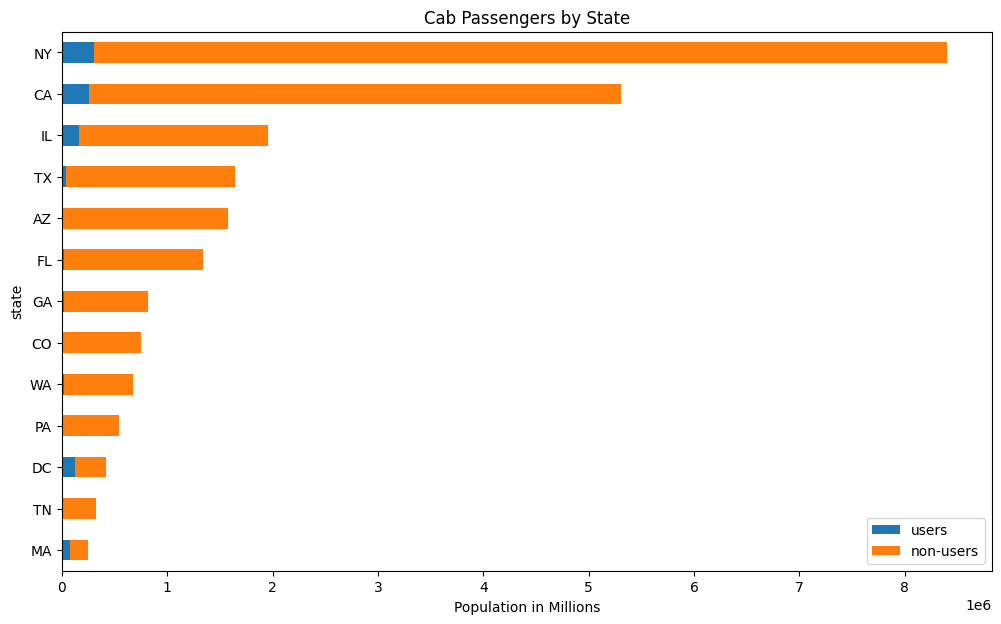

In [32]:
# Comparing the number of users and non-users by state
demograph = master_df.groupby(['state', 'city']).mean()[['population', 'users']].sum(level = 0)
demograph['non-users'] = demograph['population'] - demograph['users']
demograph.sort_values(['population', 'users'])[['users', 'non-users']].\
plot(kind = 'barh', stacked = True, figsize = (12, 7), title = "Cab Passengers by State");
plt.xlabel("Population in Millions");


The state of New York has the highest population of approximately 8.5 million followed by California which is around 5.3 million. Both of these states also have the highest number of users.

C:\Users\swimt\AppData\Local\Temp\ipykernel_1144\2327155654.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_demography = master_df.groupby(['city']).mean()[['population', 'users']].sum(level = 0)
C:\Users\swimt\AppData\Local\Temp\ipykernel_1144\2327155654.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  city_demography = master_df.groupby(['city']).mean()[['population', 'users']].sum(level = 0)


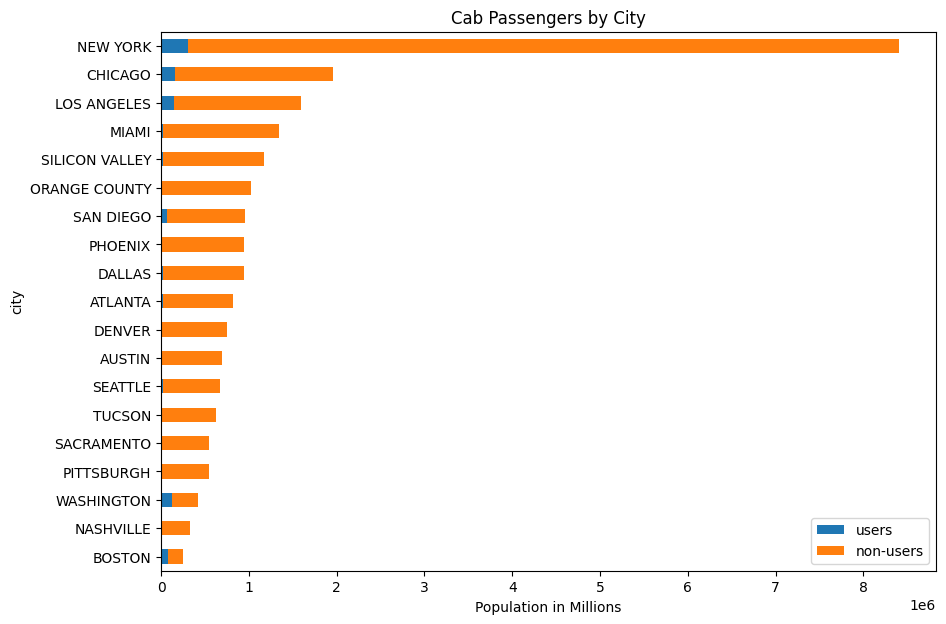

In [33]:
# Comparing the number of users and non-users by City
city_demography = master_df.groupby(['city']).mean()[['population', 'users']].sum(level = 0)

city_demography['non-users'] = city_demography['population'] - city_demography['users']

city_demography.sort_values(['population', 'users'])[['users', 'non-users']].\
plot(kind = 'barh', stacked = True, figsize = (10, 7), title = "Cab Passengers by City");

plt.xlabel("Population in Millions");

New York city has the highest number of users followed by Chicago, then Los Angeles.

In [34]:
palette = ['#D965A4', '#FFBF00']

[Text(0.5, 1.0, 'Customer Gender Proportions')]

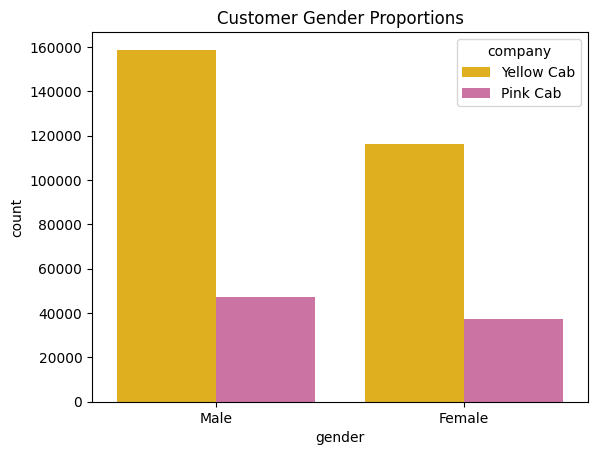

In [35]:
sns.countplot(x='gender', hue='company', data=master_df, palette=['#FFBF00','#D965A4']).set(title='Customer Gender Proportions')

## Visualizing Trips

In [36]:
# Trip count by date
trip_count = master_df.groupby(['travel_date', 'company']).size().reset_index().rename(columns={0 : 'count'})
trip_count["day"] = trip_count.travel_date.dt.day_name()
trip_count

,travel_date,company,count,day
0,2016-01-04,Pink Cab,41,Monday
1,2016-01-04,Yellow Cab,140,Monday
2,2016-01-05,Pink Cab,52,Tuesday
3,2016-01-05,Yellow Cab,126,Tuesday
4,2016-01-06,Pink Cab,4,Wednesday
...,...,...,...,...
2185,2018-12-31,Yellow Cab,630,Monday
2186,2019-01-01,Pink Cab,56,Tuesday
2187,2019-01-01,Yellow Cab,201,Tuesday
2188,2019-01-02,Pink Cab,58,Wednesday


Proportion of Male passengers are higher than Female passengers. It also seems that the proportion of Yellow Cab customers are higher than the Pink Cab customers.

Which company **Yellow Cab** or **Pink Cab** are more profitable?

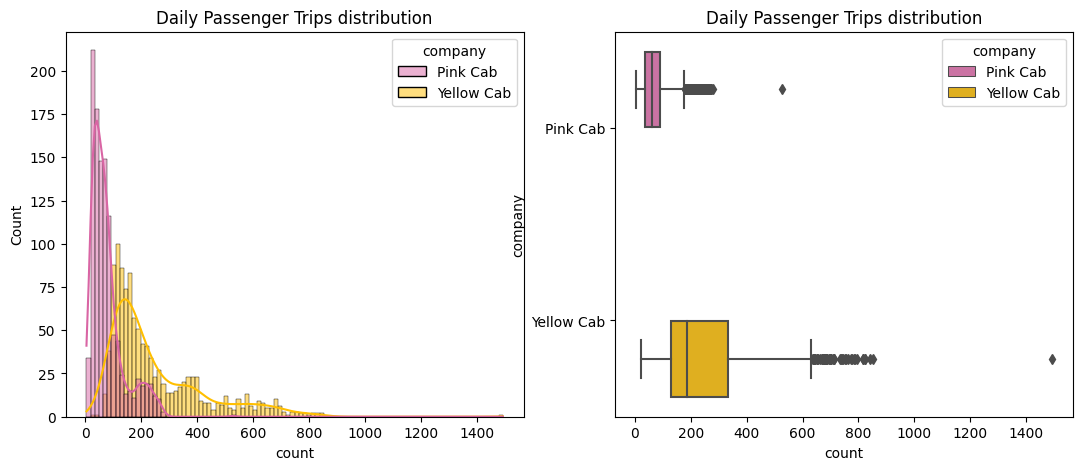

In [37]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(x = 'count', hue = 'company', data = trip_count, kde = True, palette = palette, 
             bins = 100, ax = ax[0]).set_title("Daily Passenger Trips distribution");

sns.boxplot(x = 'count', y = 'company', data = trip_count, hue = 'company', palette = palette, 
            ax = ax[1]).set_title("Daily Passenger Trips distribution");

The above plots depicts the distribution of daily trips by both Cab companies. **Yellow Cab** has higher median trips compared to **Pink Cab**. Both distributions rightly skewed, signifying that it is rarer to have a greater number of trips on some days.

**Is there any seasonality in number of customers using the cab service?**

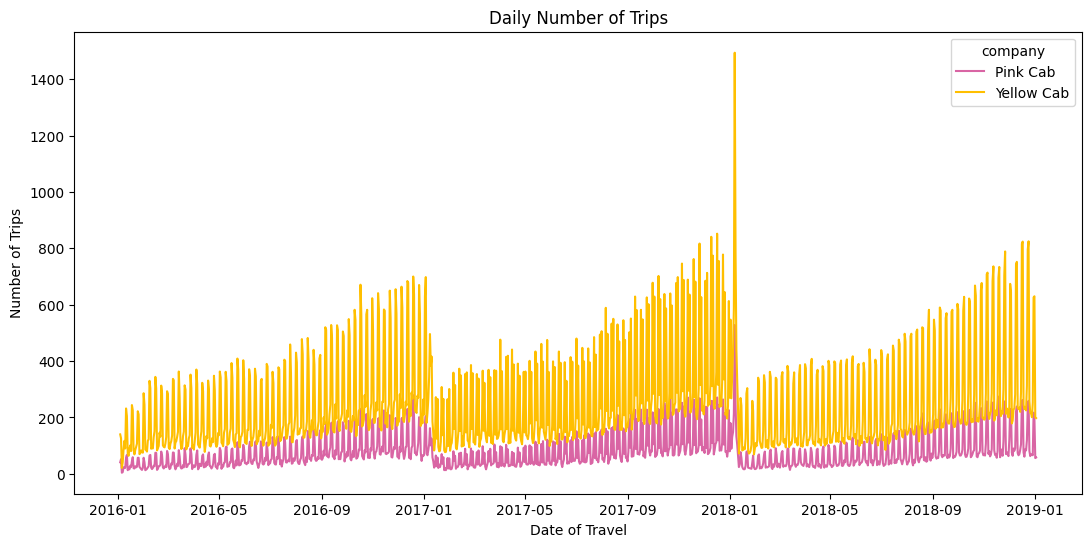

In [38]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip_count, hue = 'company', 
             palette = palette);
plt.title('Daily Number of Trips');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');

In [39]:
trip_count[trip_count['count'] > 1400]

,travel_date,company,count,day
1469,2018-01-07,Yellow Cab,1494,Sunday


The above plot displays the daily trips made by both Cab companies from the beginning of 2016 till the end of 2018. There is a clear seasonality on a weekly, monthly, as well as yearly count for both Cab companies. Both Cab companies follows generally the same patterns.

On a monthly level, there is a clear upward trend. It seems that the lowest number of trips occur at the start of the year, and increases gradually as the months go by. On a new year, the number of trips drop back down to the lowest count during that year.

On a yearly level, the trend seems to be almost uniform.

**Yellow Cab** makes significantly more trips on any given day compared to Pink Cab. The highest reported trips for both Cab companies was on January 7th, 2018.

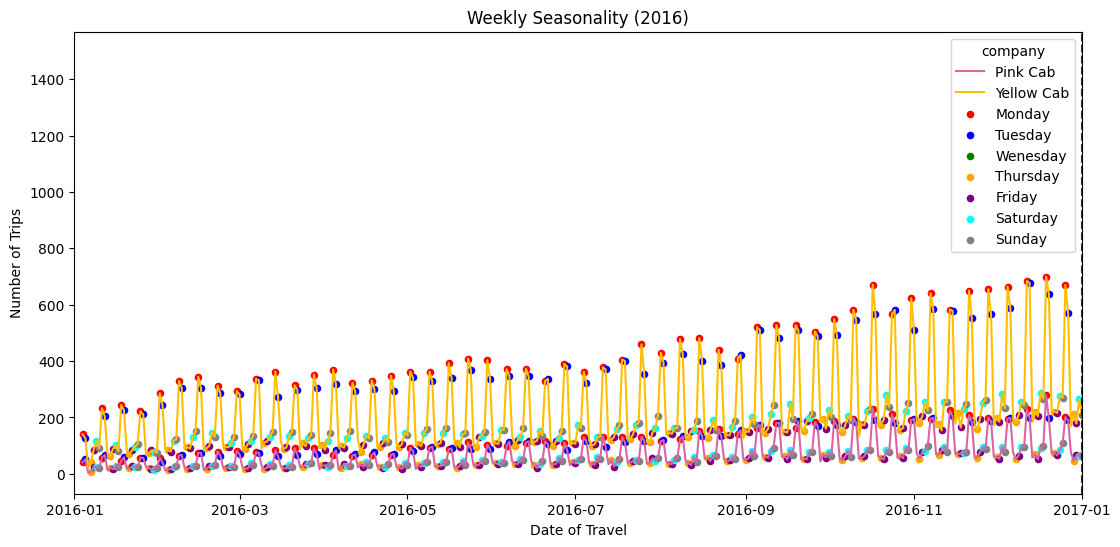

In [40]:
#Selecting range of months
#2016 to 2017
plt.figure(figsize = (13,6))

ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip_count, hue = 'company', 
             palette = palette);

plt.axvline(x = 17167, color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Monday', 'Tuesday', 'Wenesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'grey']):
    trip_count.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);


plt.title('Weekly Seasonality (2016)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(16801, 17167);

On any given month, there is a weekly seasonality where the number of trips are especially high during Monday and Tuesday for the year 2016.


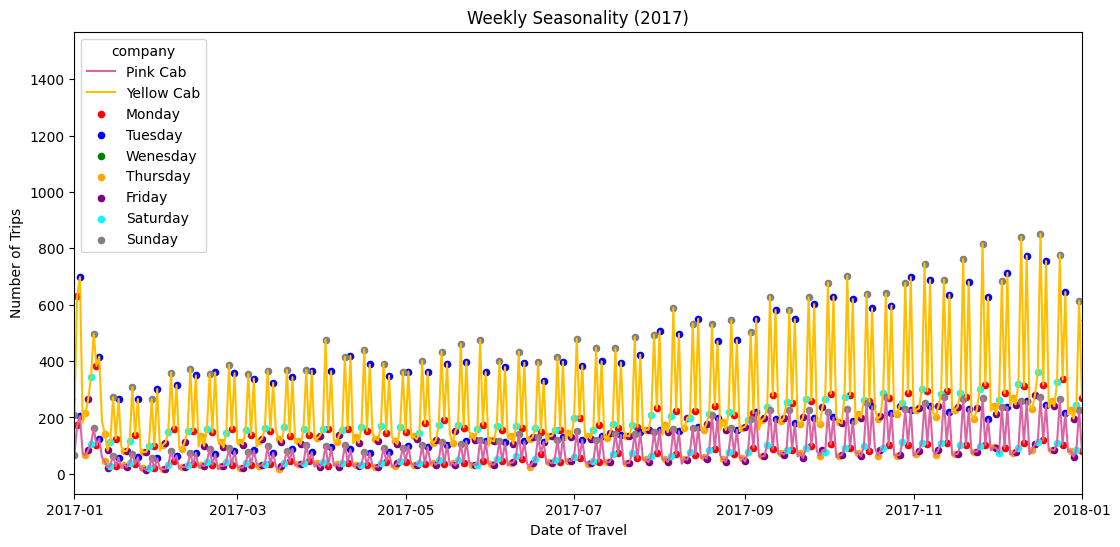

In [41]:
#Selecting range of months
#2017 to 2018
plt.figure(figsize = (13,6))

ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip_count, hue = 'company', 
             palette = palette);

plt.axvline(x = 17167, color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Monday', 'Tuesday', 'Wenesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'grey']):
    trip_count.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);


plt.title('Weekly Seasonality (2017)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(17167, 17532);

For the year 2017, the seasonality starts to change. There is an increase in number of rides during Sunday, then it dips down on Monday, and then increases again during tuesday. This pattern is observed for both cab companies.

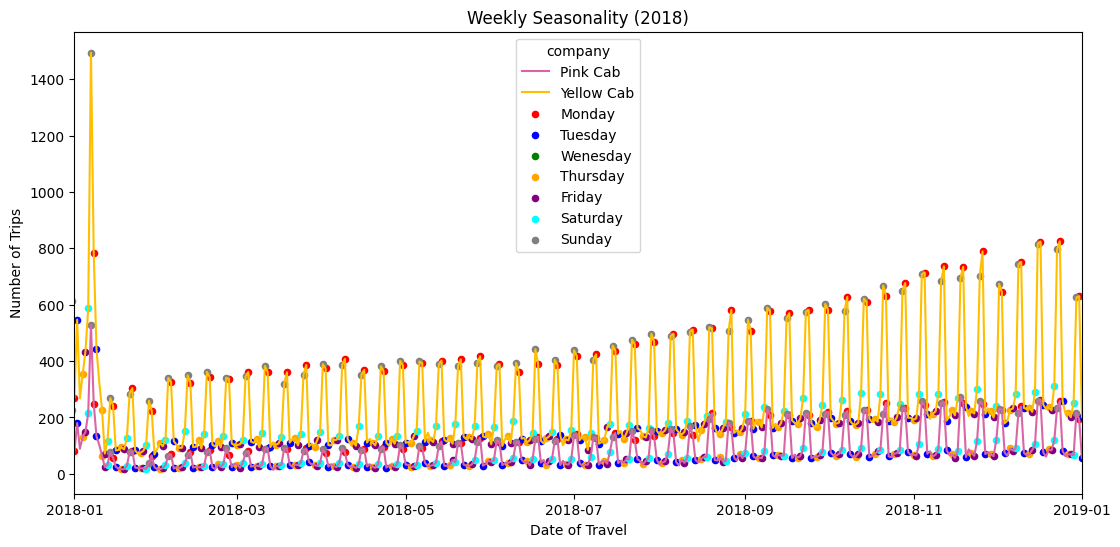

In [42]:
#Selecting range of months
#2017 to 2018
plt.figure(figsize = (13,6))

ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip_count, hue = 'company', 
             palette = palette);

plt.axvline(x = 17167, color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Monday', 'Tuesday', 'Wenesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'grey']):
    trip_count.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);


plt.title('Weekly Seasonality (2018)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(17532, 17897);

For the year 2018, the seasonality pattern is different compared to both 2016 and 2017. 

## Visualizing Trip Information

**Are the drivers profitable?**

**Assumptions**
1. I will assume that the expenses for the trip only involves fuel charges
2. There isnt sufficient data on the internet for the base fares per year for each city in the US. This will be left out of the analysis.

In [43]:
master_df['profit'] = master_df.price_charged - master_df.cost_of_trip
master_df

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,customer_income,state,profit
0,10000429,2016-01-04,Yellow Cab,BOSTON,15.15,342.62,205.4340,248968,80021,57474,Card,Male,34,16558,MA,137.1860
1,10000525,2016-01-04,Yellow Cab,CHICAGO,2.18,51.47,26.4216,1955130,164468,4551,Cash,Male,19,6316,IL,25.0484
2,10001234,2016-01-04,Yellow Cab,SEATTLE,39.60,1119.67,541.7280,671238,25063,38146,Cash,Male,36,6577,WA,577.9420
3,10001311,2016-01-04,Yellow Cab,WASHINGTON,34.65,707.94,474.0120,418859,127001,53048,Card,Male,23,31566,DC,233.9280
4,10000927,2016-01-04,Yellow Cab,NEW YORK,34.56,1121.11,485.2224,8405837,302149,1808,Cash,Male,59,18999,NY,635.8876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10436500,2019-01-02,Yellow Cab,WASHINGTON,11.00,166.49,132.0000,418859,127001,53140,Card,Female,40,7870,DC,34.4900
359388,10433435,2019-01-02,Pink Cab,MIAMI,2.30,29.53,23.9200,1339155,17675,9774,Cash,Female,33,14322,FL,5.6100
359389,10436696,2019-01-02,Pink Cab,BOSTON,27.55,377.85,330.6000,248968,80021,60000,Cash,Female,27,20303,MA,47.2500
359390,10433418,2019-01-02,Pink Cab,LOS ANGELES,2.34,29.21,25.0380,1595037,144132,7650,Card,Female,32,17629,CA,4.1720


In [44]:
master_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
km_travelled,359392.0,22.567254,12.233526,1.90,12.0000,22.440,32.9600,48.000
price_charged,359392.0,423.443311,274.378911,15.60,206.4375,386.360,583.6600,2048.030
cost_of_trip,359392.0,286.190113,157.993661,19.00,151.2000,282.480,413.6832,691.200
profit,359392.0,137.253198,160.311840,-220.06,28.0120,81.962,190.0300,1463.966


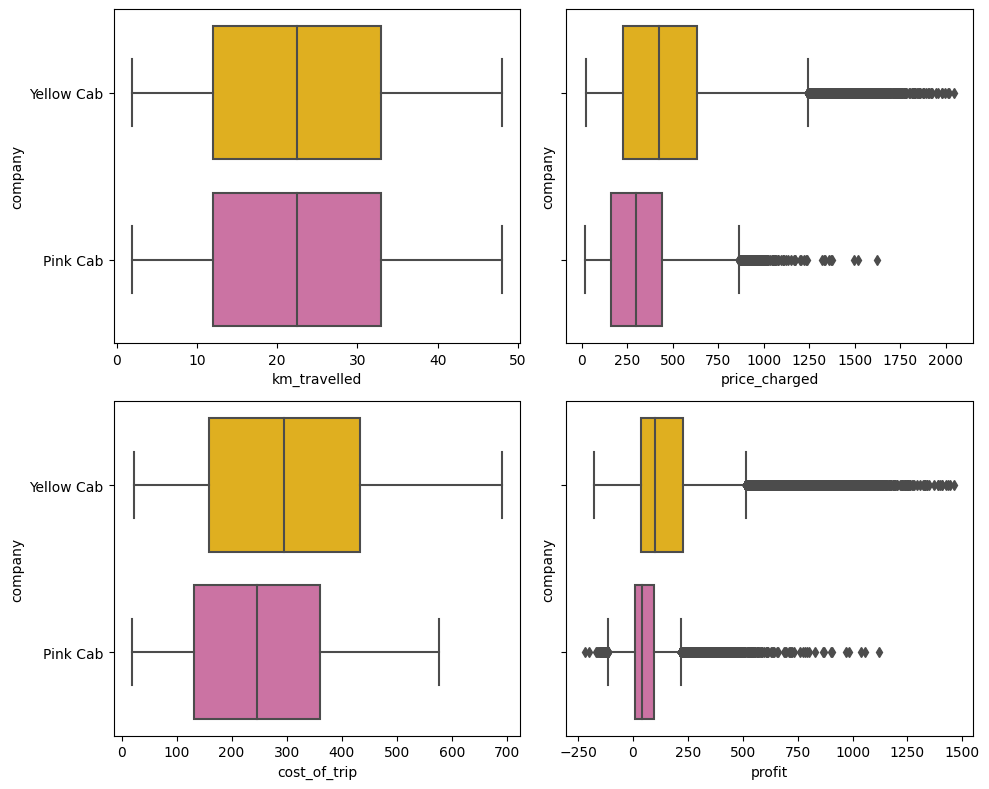

In [45]:
fig, axes = plt.subplots(2,2, figsize = (10,8), sharey = True)

for i, ax in zip(['km_travelled', 'price_charged', 'cost_of_trip', 'profit'], 
                   axes.flatten()):
    
    sns.boxplot(x = i, data = master_df, y = 'company', ax = ax, palette = ['#FFBF00','#D965A4']);
    plt.tight_layout();

The plots above displays a distribution of features related to the trip. The distributions of km_travelled as well as cost_of_trip both follow a uniform distribution. Both Price charged, as well as profit follow a Gaussian distribution that is rightly skewed.

It is shown in the profit boxplot that both companies has some losses, shown on the left side of the profit boxplot. This will be further explored later in this notebook.

High outliers appear on the right side of both the profit and price change columns. Both cab companies have the same median distance travelled. **Yellow Cab** has higher cab expenses overall and the median price charged of **Pink Cab** is lower than it's rival company, although the profit of **Yellow Cab** is significantly higher.


Next, I will visualize the data in a way that might reveal correlation within the features. Only a sample of the data will be used in this portion as it is computationally expensive to plot a Pairplot using the whole dataset.

**Is there any correlation with the features in the dataset?**

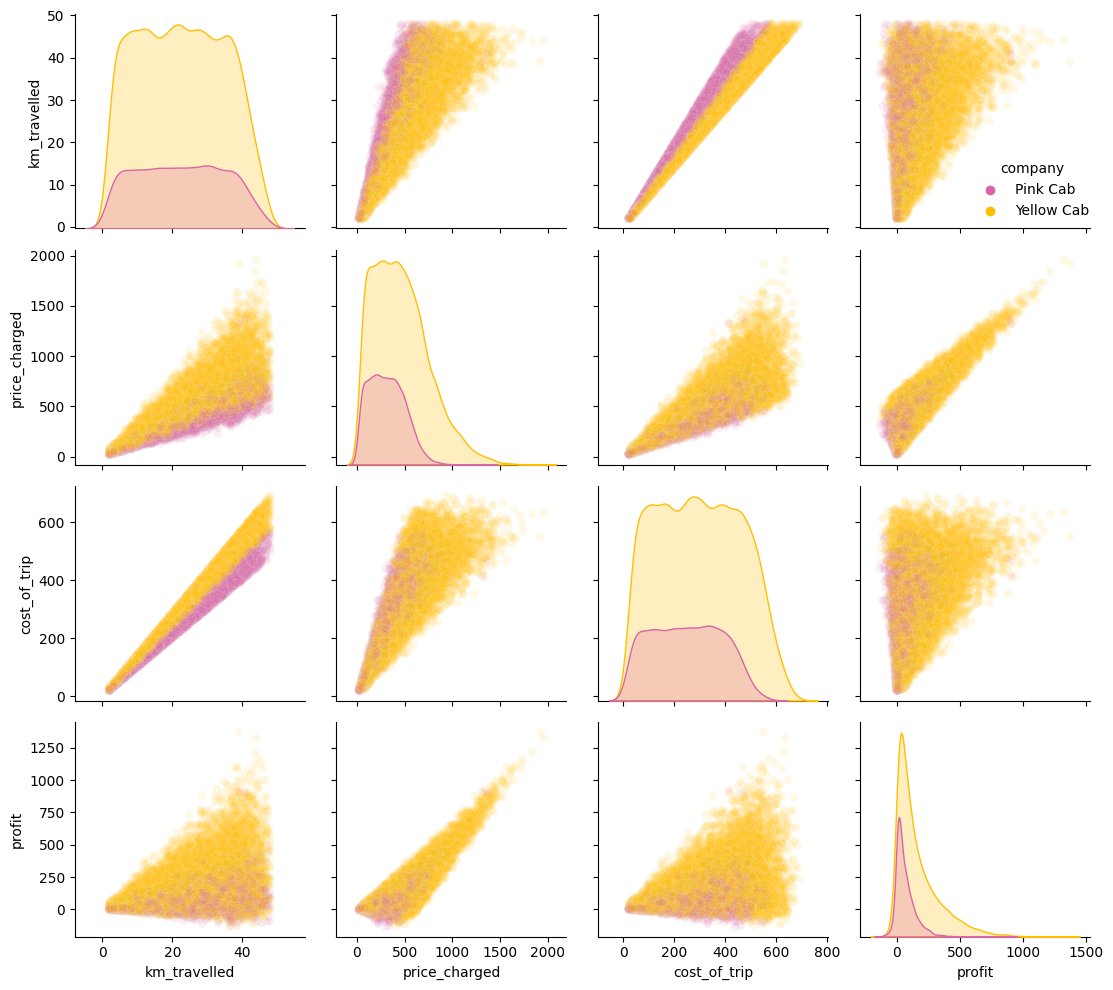

In [46]:
part1_df = master_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit', 
                      'company']].sample(frac = 0.05, random_state=42)

g = sns.pairplot(part1_df, hue = 'company', hue_order = ['Pink Cab', 'Yellow Cab'], 
             palette = palette, plot_kws={'alpha': 0.1});

g._legend.set_bbox_to_anchor((0.98, 0.8))

plt.tight_layout()

C:\Users\swimt\AppData\Local\Temp\ipykernel_1144\392249159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(part1_df.corr(), annot=True, center=0)


<AxesSubplot: >

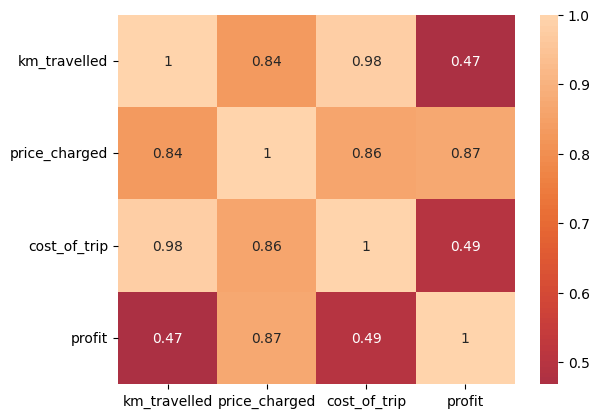

In [47]:
sns.heatmap(part1_df.corr(), annot=True, center=0)

The above plots clearly depicts that all features are correlated with each other. Generally, as the distance travelled increases, both Cab expenses and Cab fares increases. 

There is high positive linear correlation between distance travelled, and Cab expenses.

Between price charged and distance travelled, the amount of spread is lower when the price charged is low, but increases and the distance increases.

Between price charged and profit, the amount of spread is higher when the price charged is low, but decreases as the price charged increases.

### Losses

In this section, we will look closely at the trips that did not turn a profit.

In [48]:
loss = master_df.query("profit <= 0")
loss

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,customer_income,state,profit
45,10000070,2016-01-04,Pink Cab,DENVER,7.02,61.30,82.8360,754233,12421,30718,Cash,Male,52,20255,CO,-21.5360
65,10000067,2016-01-04,Pink Cab,DALLAS,33.32,308.58,386.5120,942908,22157,25247,Cash,Male,26,24178,TX,-77.9320
66,10000066,2016-01-04,Pink Cab,DALLAS,13.13,122.42,149.6820,942908,22157,25155,Card,Male,27,10997,TX,-27.2620
164,10000356,2016-01-04,Pink Cab,SEATTLE,14.95,171.47,171.9250,671238,25063,38635,Card,Male,31,24682,WA,-0.4550
416,10000378,2016-01-07,Pink Cab,WASHINGTON,29.75,295.60,348.0750,418859,127001,51246,Card,Male,61,2035,DC,-52.4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359339,10438103,2019-01-02,Yellow Cab,CHICAGO,9.50,123.01,123.1200,1955130,164468,5041,Card,Female,33,13629,IL,-0.1100
359348,10437817,2019-01-02,Yellow Cab,BOSTON,38.85,504.11,540.7920,248968,80021,59494,Cash,Female,35,17699,MA,-36.6820
359366,10438192,2019-01-02,Yellow Cab,CHICAGO,38.61,469.94,509.6520,1955130,164468,3647,Card,Female,28,23471,IL,-39.7120
359373,10434558,2019-01-02,Yellow Cab,CHICAGO,35.34,471.81,496.1736,1955130,164468,5085,Card,Female,33,10274,IL,-24.3636


There are about 24823 trips that ended up with a negative profit.

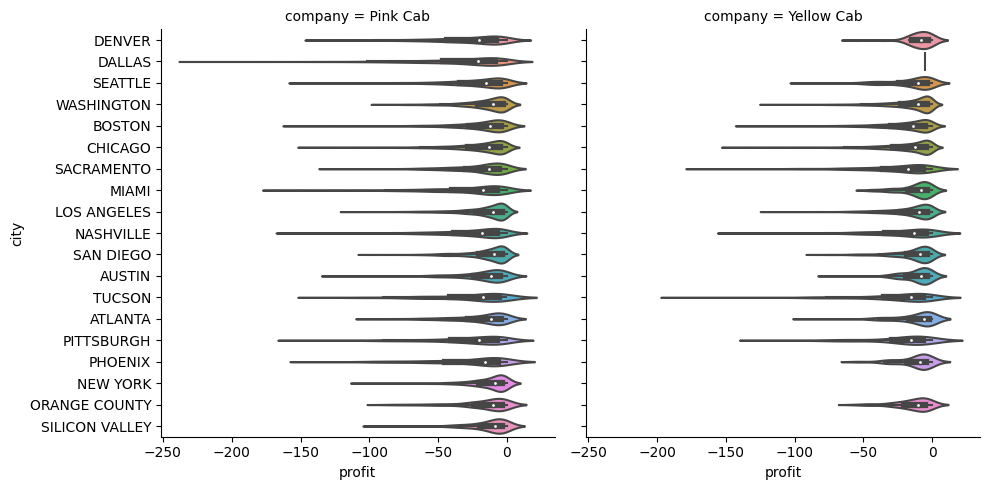

In [49]:
sns.catplot(y = 'city', x = 'profit', col = 'company', data = loss, kind = 'violin');

Although both companies include trips with negative profit, trips made by **Pink Cab** across all cities has had a higher frequency of losses compared to **Yellow Cab**. These losses could affect the overall profit margin of **Pink Cab**

**When and how much was the greatest total losses made by both companies?**

C:\Users\swimt\AppData\Local\Temp\ipykernel_1144\2900978883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_loss = loss.groupby(['travel_date', 'company']).sum()['profit'].sort_values().reset_index()


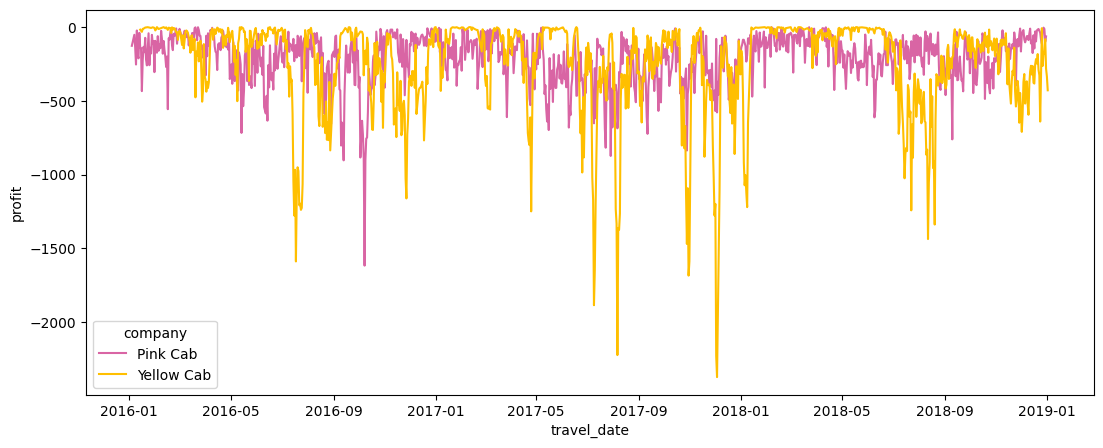

In [50]:
total_loss = loss.groupby(['travel_date', 'company']).sum()['profit'].sort_values().reset_index()

plt.figure(figsize = (13,5))

ax = sns.lineplot(x = 'travel_date', y = 'profit', data = total_loss, hue = 'company', 
             hue_order = ['Pink Cab', 'Yellow Cab'], palette = palette);

In [51]:
total_loss[total_loss['profit'] < -2000]

,travel_date,company,profit
0,2017-12-03,Yellow Cab,-2373.1712
1,2017-12-02,Yellow Cab,-2229.7084
2,2017-08-06,Yellow Cab,-2223.9512


In [52]:
total_loss[total_loss['profit'] < -1500]

,travel_date,company,profit
0,2017-12-03,Yellow Cab,-2373.1712
1,2017-12-02,Yellow Cab,-2229.7084
2,2017-08-06,Yellow Cab,-2223.9512
3,2017-12-04,Yellow Cab,-1973.4316
4,2017-07-09,Yellow Cab,-1885.8364
5,2017-10-30,Yellow Cab,-1685.0984
6,2017-07-10,Yellow Cab,-1650.2812
7,2016-10-08,Pink Cab,-1617.5000
8,2016-07-18,Yellow Cab,-1589.0492
9,2017-10-31,Yellow Cab,-1588.0868


The above plot displays the trips that only made losses which is aggregated at a daily level by summing up the losses. that there are few clusters of losses during certain time periods at particular months. Most apparent in August.
- The greatest loss that **Yellow Cab** has experienced during a day was on 12-03-2017, where the company lost around 2373.17 dollars in profit
- The greatest loss that **Pink Cab** has experienced during a day was on 10-08-2016, where the company lost around 1617.50 dollars in profit

**In which city does both companies makes most bad trips?**

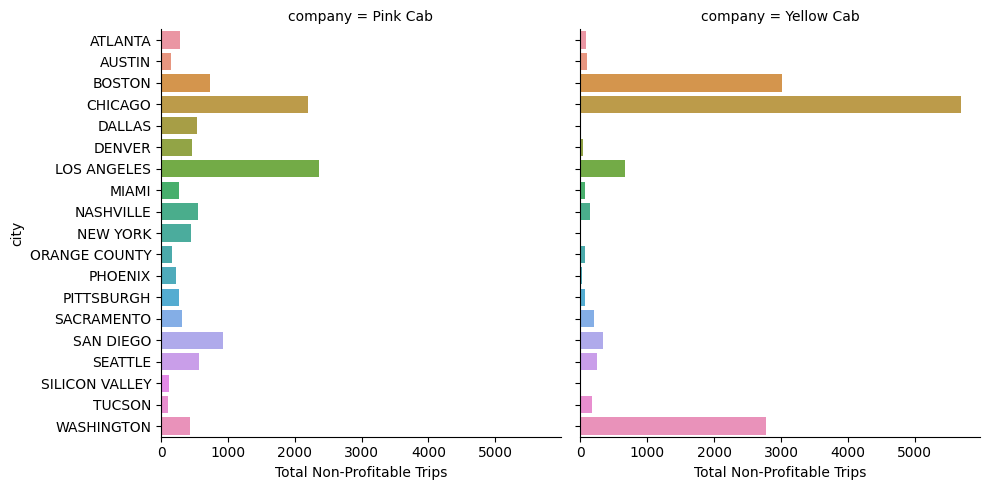

In [53]:
loss_city = loss.groupby(['city', 'company']).size().reset_index().rename(columns = {0:'count'})

g = sns.catplot(y = 'city', x = 'count', col = 'company', data = loss_city, kind = 'bar');

g.set_xlabels("Total Non-Profitable Trips");

According to the data, the most number of non-profit trips made by **Yellow Cab** was Chicaco, Boston, and Washington. For the **Pink Cab**, the highest number of non-profit trips was Los Angeles, Chicago, and Boston.


**Does price charged vary at State level?**

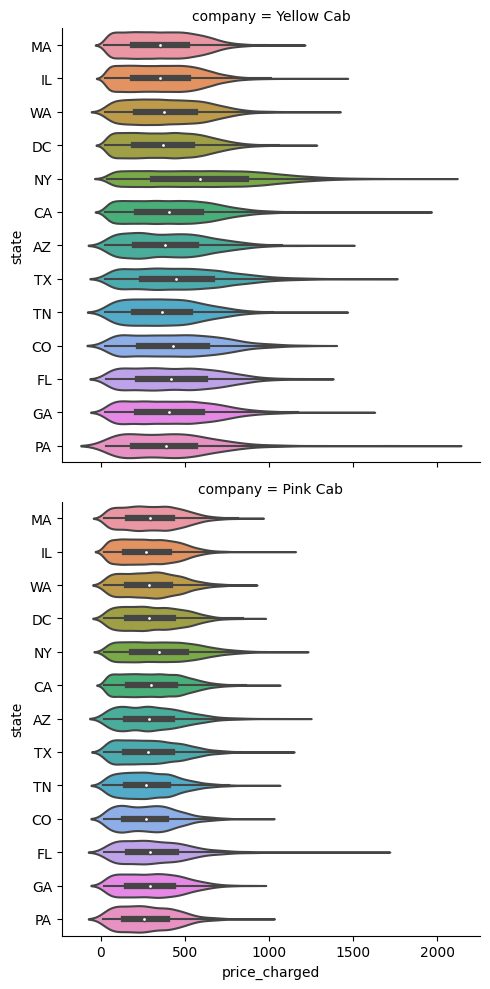

In [54]:
sns.catplot(x = 'price_charged', y = 'state', data = master_df, row = 'company', kind = 'violin');

plt.tight_layout()

According to the plot above, the most varied price charged for **Yellow Cab** was in New York and Pensylvania. For the **Pink Cab**, the most varied price charged is in Florida.

**Does profit vary at State level?**

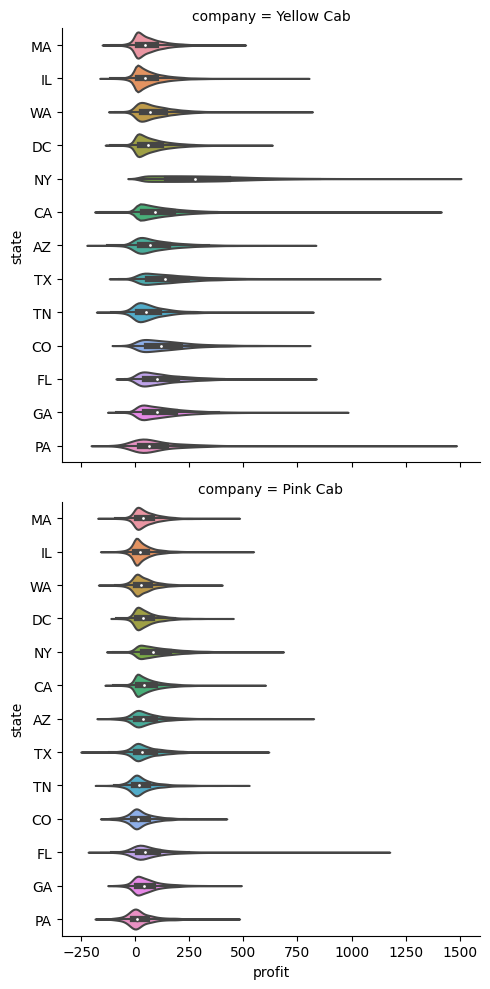

In [55]:
sns.catplot(x='profit', y='state', data=master_df, row='company', kind='violin')

According to the plot above, the most varied profit margin for **Yellow Cab** was in New York and Pensylvania. For the **Pink Cab**, the most varied profit margin is in Florida.

# Conclusion

After analyzing both cab companies, here is a summary of my analysis:
- Both Cab companies financial performance is mainly based on profit. Profit derived from the difference of the **price charged** and **cost of trip** for each trip. Both of these variables are highly correlated with the **distance travelled** for each trip.
- There is **weekly, monthly, and quarterly seasonality** on the number of rised in a given time period. The number of cab rides are higher during December and the lowest during February.
- **Yellow Cab** seems to perform well almost on all cities and is able to make significantly higher profits compared to its rival. A reason for this may be because **Yellow Cab** has higher coverage on cities compared to **Pink Cab**.
**In conclusion, we can measure a company's performance by looking at the total number of daily trips. Based on the observations, we can determine that Yellow Cab is a better investment than Pink Cab.